# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import matplotlib.patches as mpatches

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# Loading data and assigning it specific variables. sat representing the SAT data, and act representing ACT data

sat = pd.read_csv('../data/sat.csv')
act = pd.read_csv('../data/act.csv')

##### 2. Print the first ten rows of each dataframe.

In [2]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [3]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

SAT data
    - Unnamed: 0 column seems to represent the row count. This column should be removed.
    - State column represents the part of the country from which the data was collected. These are states, as well as the District of Columbia. For ease of reference, I will call all values in this row 'states' going forward.
    - Participation column is the percentage of student participation in each state.
    - Evidenced-based Reading and Writing column is self-descriptive and represents scores as an integer.
    - Math column is self-descriptive and represents scores as an integer.
    - Total column represents the sum of the evidenced-based Reading and writing score and math score. It is an integer.

ACT data:
    - Unnamed: 0 column seems to represent the row count. This column should be removed.
    - State column represents the part of the country from which the data was collected. These are states, as well as the District of Columbia. It is worth noting that the first row is not a state nor district, but what seems to be the average of all the data. This row is named "National". For ease of reference, I will call all values in this row 'states' going forward.
    - Participation column is the percentage of student participation in each state.
    - English column represents English test scores as floats.
    - Math column represents Math test scores as floats.
    - Reading column represents Reading test scores as floats.
    - Science column represents Science test scores as floats.
    - Compositite score repesents an amalgamation of English, Math, Reading, and Science scores. Composite column is also float. 
    

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [4]:
# act.isnull().sum()
# sat.isnull().sum()
# act.describe()
# sat.describe()
# sat.info()
# act.info()


The data does appear to be complete. No null objects were found while attempting to munge the data. 
However, as noted previously, ACT has the "National" state averaging scores from all other states while SAT does not.
Also, the "Unnamed" column serves no purpose, and will be removed.

In [5]:
# Remove the unneccesary column from SAT:
sat.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# Remove the unneccesary column from ACT:
act.drop('Unnamed: 0', axis=1, inplace=True)

##### 5. Print the types of each column.

In [7]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [8]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

Participation is an object, but should be a float. Let's go ahead and do that using the .map method. We'll remove the % and convert the values to floats. Also, subject-scores from the SAT are stored as integers, and with commas. We'll remove the commas and convert the values to floats via the same method.

In [9]:
# Use .map() to remove the '%' and convert object to float

sat.Participation = sat.Participation.map(lambda x: float(x.replace('%','')))

In [10]:
# Use .map() to remove the '%' and convert object to float

act.Participation = act.Participation.map(lambda x: float(x.replace('%','')))

In [11]:
# Rather than using a more complex method, we'll divide our ints by a float to convert them all to floats.
# This also removes the comma.


sat.Math = sat.Math/ 1.0
sat.Total = sat.Total/ 1.0

In [12]:
# Diff float conversion method b/c of odd column name

sat['Evidence-Based Reading and Writing'] = sat['Evidence-Based Reading and Writing'] /1.0

In [13]:
sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [14]:
#ACT Dictionaries. Need one for each subject-scores, as well as composite

act_sci = {k:v for (k,v) in zip(act['State'],act['Science'])}
act_math = {k:v for (k,v) in zip(act['State'],act['Math'])}
act_read = {k:v for (k,v) in zip(act['State'],act['Reading'])}
act_eng = {k:v for (k,v) in zip(act['State'],act['English'])}
act_composite = {k:v for (k,v) in zip(act['State'],act['Composite'])}

In [15]:
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0


In [16]:
#SAT Dictionaries. Need one for subject-scores, as well as total

sat_read_write = {k:v for (k,v) in zip(sat['State'],sat['Evidence-Based Reading and Writing'])}
sat_math = {k:v for (k,v) in zip(sat['State'],sat['Math'])}
sat_total = {k:v for (k,v) in zip(sat['State'],sat['Total'])}

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [17]:
#ACT dictionary iterable list
act_dict = act.to_dict(orient = 'list')
act_dict

{'Composite': [21.0,
  19.2,
  19.8,
  19.7,
  19.4,
  22.8,
  20.8,
  25.2,
  24.1,
  24.2,
  19.8,
  21.4,
  19.0,
  22.3,
  21.4,
  22.6,
  21.9,
  21.7,
  20.0,
  19.5,
  24.3,
  23.6,
  25.4,
  24.1,
  21.5,
  18.6,
  20.4,
  20.3,
  21.4,
  17.8,
  25.5,
  23.9,
  19.7,
  24.2,
  19.1,
  20.3,
  22.0,
  19.4,
  21.8,
  23.7,
  24.0,
  18.7,
  21.8,
  19.8,
  20.7,
  20.3,
  23.6,
  23.8,
  21.9,
  20.4,
  20.5,
  20.2],
 'English': [20.3,
  18.9,
  18.7,
  18.6,
  18.9,
  22.5,
  20.1,
  25.5,
  24.1,
  24.4,
  19.0,
  21.0,
  17.8,
  21.9,
  21.0,
  22.0,
  21.2,
  21.1,
  19.6,
  19.4,
  24.2,
  23.3,
  25.4,
  24.1,
  20.4,
  18.2,
  19.8,
  19.0,
  20.9,
  16.3,
  25.4,
  23.8,
  18.6,
  23.8,
  17.8,
  19.0,
  21.2,
  18.5,
  21.2,
  23.4,
  24.0,
  17.5,
  20.7,
  19.5,
  19.5,
  19.5,
  23.3,
  23.5,
  20.9,
  20.0,
  19.7,
  19.4],
 'Math': [20.7,
  18.4,
  19.8,
  19.8,
  19.0,
  22.7,
  20.3,
  24.6,
  23.4,
  23.5,
  19.4,
  20.9,
  19.2,
  21.8,
  21.2,
  22.4,
  21.3

In [18]:
#SAT dictionary iterable list
sat_dict = sat.to_dict(orient = 'list')
sat_dict

{'Evidence-Based Reading and Writing': [593.0,
  547.0,
  563.0,
  614.0,
  531.0,
  606.0,
  530.0,
  503.0,
  482.0,
  520.0,
  535.0,
  544.0,
  513.0,
  559.0,
  542.0,
  641.0,
  632.0,
  631.0,
  611.0,
  513.0,
  536.0,
  555.0,
  509.0,
  644.0,
  634.0,
  640.0,
  605.0,
  629.0,
  563.0,
  532.0,
  530.0,
  577.0,
  528.0,
  546.0,
  635.0,
  578.0,
  530.0,
  560.0,
  540.0,
  539.0,
  543.0,
  612.0,
  623.0,
  513.0,
  624.0,
  562.0,
  561.0,
  541.0,
  558.0,
  642.0,
  626.0],
 'Math': [572.0,
  533.0,
  553.0,
  594.0,
  524.0,
  595.0,
  512.0,
  492.0,
  468.0,
  497.0,
  515.0,
  541.0,
  493.0,
  556.0,
  532.0,
  635.0,
  628.0,
  616.0,
  586.0,
  499.0,
  52.0,
  551.0,
  495.0,
  651.0,
  607.0,
  631.0,
  591.0,
  625.0,
  553.0,
  520.0,
  526.0,
  561.0,
  523.0,
  535.0,
  621.0,
  570.0,
  517.0,
  548.0,
  531.0,
  524.0,
  521.0,
  603.0,
  604.0,
  507.0,
  614.0,
  551.0,
  541.0,
  534.0,
  528.0,
  649.0,
  604.0],
 'Participation': [5.0,
  38.0,
  3

##### 9. Merge the dataframes on the state column.

In [19]:
#Inner join on the State column. Default join is inner so "How" not specified

merged_act_sat = pd.merge(act, sat, on='State')
merged_act_sat.head()

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [20]:
# Since the data are contained within dicts, we'll use the dictionary substitution method

clean_merge = merged_act_sat.rename(columns={'Participation_x':'ACT Participation','English': 'ACT English', 'Math_x': 'ACT Math',
                               'Reading':'ACT Reading', 'Science':'ACT Science','Composite':'ACT Composite', 'Participation_y': 'SAT Participation','Evidence-Based Reading and Writing': 'SAT Reading and Writing', 'Math_y': 'SAT Math', 'Total': 'SAT Total'
                          })

In [21]:
clean_merge

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606.0,595.0,1201.0
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,1017.0


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [22]:
clean_merge_min= clean_merge.min(axis=0, numeric_only=True)
print ('The minimum score values are \n', 
       clean_merge_min)

The minimum score values are 
 ACT Participation            8.0
ACT English                 16.3
ACT Math                    18.0
ACT Reading                 18.1
ACT Science                  2.3
ACT Composite               17.8
SAT Participation            2.0
SAT Reading and Writing    482.0
SAT Math                    52.0
SAT Total                  950.0
dtype: float64


In [23]:
clean_merge_max = clean_merge.max(axis=0, numeric_only=True)
print ('The maximum score values are \n', 
       clean_merge_max)

The maximum score values are 
 ACT Participation           100.0
ACT English                  25.5
ACT Math                     25.3
ACT Reading                  26.0
ACT Science                  24.9
ACT Composite                25.5
SAT Participation           100.0
SAT Reading and Writing     644.0
SAT Math                    651.0
SAT Total                  1295.0
dtype: float64


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [24]:
clean_merge.dtypes

State                       object
ACT Participation          float64
ACT English                float64
ACT Math                   float64
ACT Reading                float64
ACT Science                float64
ACT Composite              float64
SAT Participation          float64
SAT Reading and Writing    float64
SAT Math                   float64
SAT Total                  float64
dtype: object

In [25]:
#Standard Deviation Finder. Going to use pandas

def std_finder(df):
    return [df[col].std() for col in df.select_dtypes(include = ['int64', 'float']).columns.tolist()]

In [26]:
#95% sure this is working correctly

sd = std_finder(clean_merge)
sd

[32.14084201588683,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341,
 35.276632270013046,
 45.66690138768932,
 84.90911865855486,
 92.49481172519046]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [27]:
# Was told by our local instructor not to do this as it will make the rest of the calculations more tedious.

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [28]:
#Unsure if this is explicitly saying to sort by SAT Participation, but we'll do it anyway...

clean_merge.sort_values('SAT Participation', ascending=False)

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
22,Michigan,29.0,24.1,23.7,24.5,23.8,24.1,100.0,509.0,495.0,1005.0
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0
12,Idaho,38.0,21.9,21.8,23.0,22.1,22.3,93.0,513.0,493.0,1005.0
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,1017.0
21,Massachusetts,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555.0,551.0,1107.0
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539.0,524.0,1062.0


In [29]:
clean_merge.sort_values('ACT Participation', ascending=False)

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
17,Kentucky,100.0,19.6,19.4,20.5,20.1,20.0,4.0,631.0,616.0,1247.0
49,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5,3.0,642.0,649.0,1291.0
44,Utah,100.0,19.5,19.9,20.8,20.6,20.3,3.0,624.0,614.0,1238.0
42,Tennessee,100.0,19.5,19.2,20.1,19.9,19.8,5.0,623.0,604.0,1228.0
40,South Carolina,100.0,17.5,18.6,19.1,18.9,18.7,50.0,543.0,521.0,1064.0
36,Oklahoma,100.0,18.5,18.8,20.1,19.6,19.4,7.0,530.0,517.0,1047.0
33,North Carolina,100.0,17.8,19.3,19.6,19.3,19.1,49.0,546.0,535.0,1081.0
28,Nevada,100.0,16.3,18.0,18.1,18.2,17.8,26.0,563.0,553.0,1116.0
26,Montana,100.0,19.0,20.2,21.0,20.5,20.3,10.0,605.0,591.0,1196.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [30]:
# Filtering on states with ACT Science scores greater than 23

clean_merge[(clean_merge)['ACT Science'] >= 23.0]

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0
21,Massachusetts,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555.0,551.0,1107.0
22,Michigan,29.0,24.1,23.7,24.5,23.8,24.1,100.0,509.0,495.0,1005.0
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
30,New Jersey,34.0,23.8,23.8,24.1,23.2,23.9,70.0,530.0,526.0,1056.0
32,New York,31.0,23.8,24.0,24.6,23.9,24.2,67.0,528.0,523.0,1052.0
38,Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7,65.0,540.0,531.0,1071.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

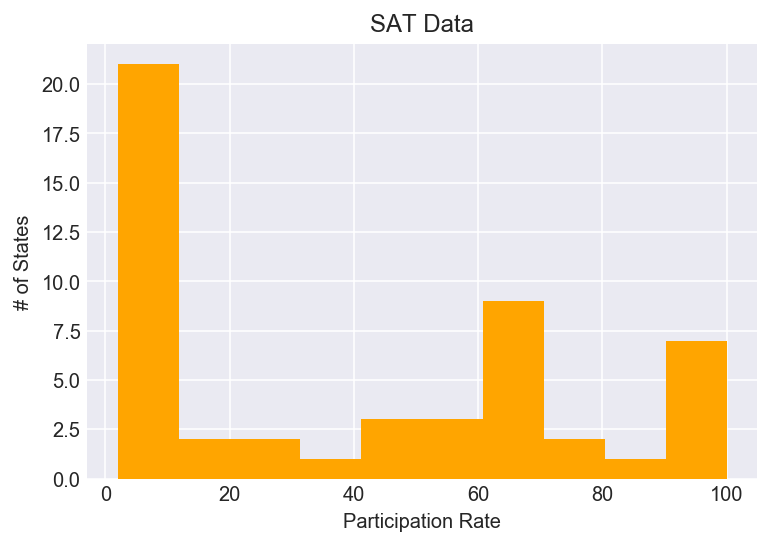

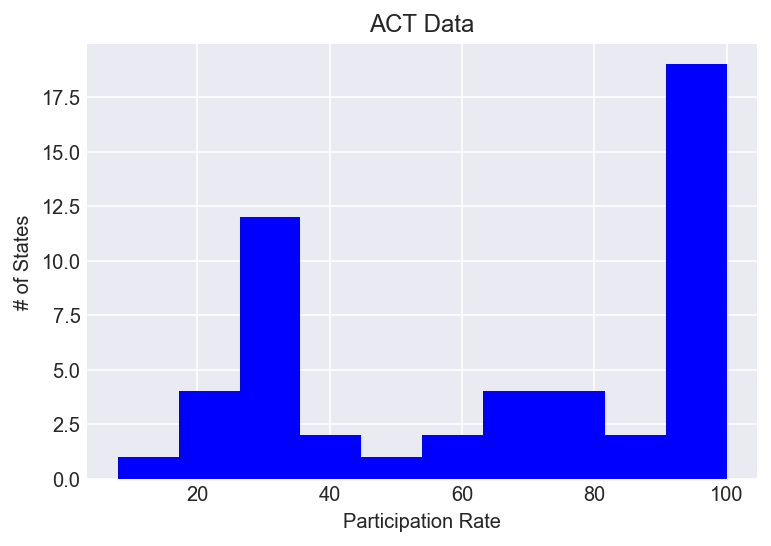

In [31]:
#plt.figure(n) calls out which order multiple figures should be arranged
#Used orange and blue b/c they're opposite colors on color-wheel. Aesthetics!


plt.figure(1)
plt.hist(clean_merge['SAT Participation'], facecolor='orange')
plt.title('SAT Data')
plt.xlabel('Participation Rate')
plt.ylabel('# of States')

plt.figure(2)
plt.hist(clean_merge['ACT Participation'], facecolor='blue')
plt.title('ACT Data')
plt.xlabel('Participation Rate')
plt.ylabel('# of States');

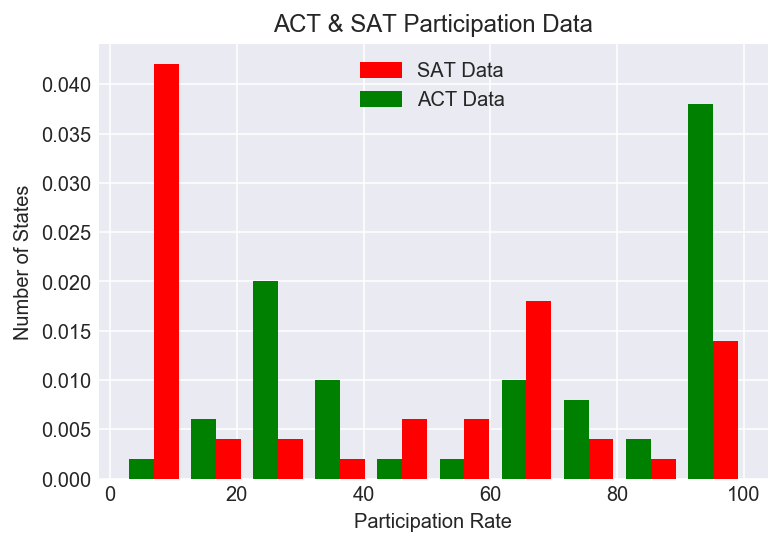

In [32]:
xx = clean_merge["ACT Participation"]
yy = clean_merge["SAT Participation"]

red_patch = mpatches.Patch(color='red', label='SAT Data')
green_patch = mpatches.Patch(color='green', label='ACT Data')

plt.hist([xx, yy], color=['g','r'], normed=True);
plt.title('ACT & SAT Participation Data')
plt.xlabel('Participation Rate')
plt.ylabel('Number of States');
plt.legend(handles=[red_patch, green_patch])

##### 17. Plot the Math(s) distributions from both data sets.

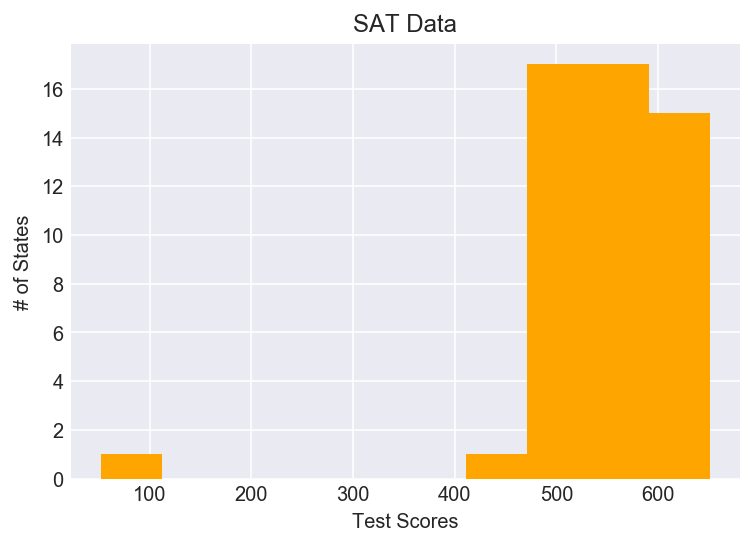

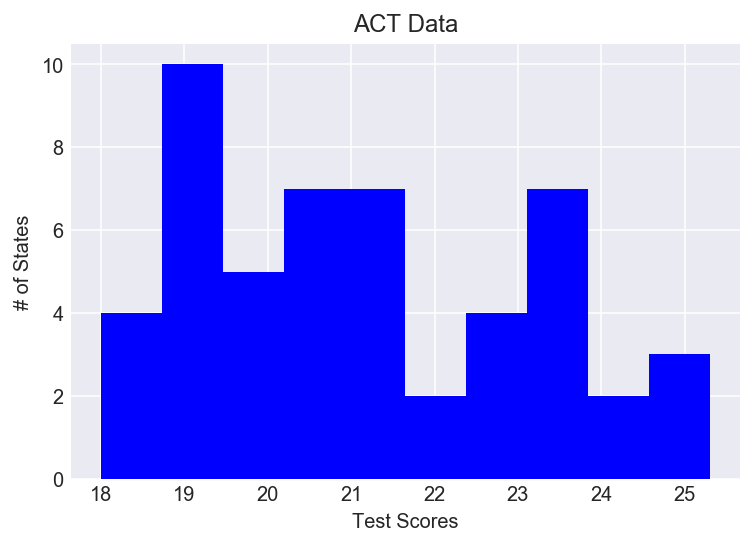

In [33]:
plt.figure(1)
plt.hist(clean_merge['SAT Math'], facecolor='orange')
plt.title('SAT Data')
plt.xlabel('Test Scores')
plt.ylabel('# of States')

plt.figure(2)
plt.hist(clean_merge['ACT Math'], facecolor='blue')
plt.title('ACT Data')
plt.xlabel('Test Scores')
plt.ylabel('# of States');

##### 18. Plot the Verbal distributions from both data sets.

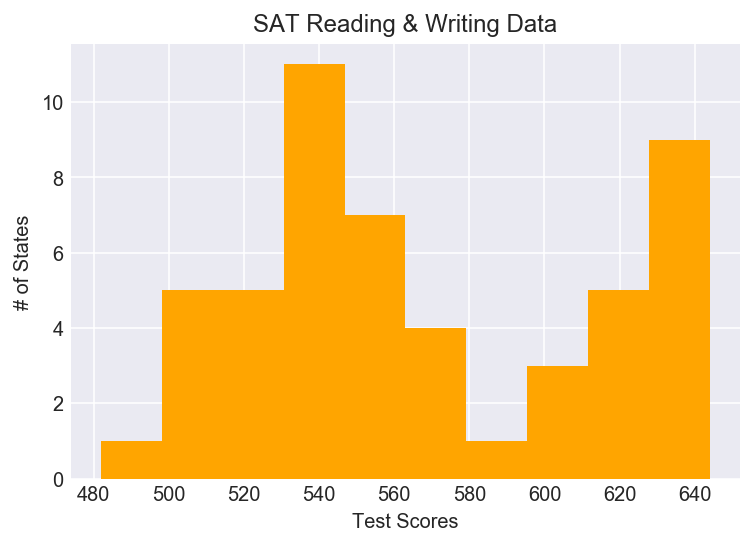

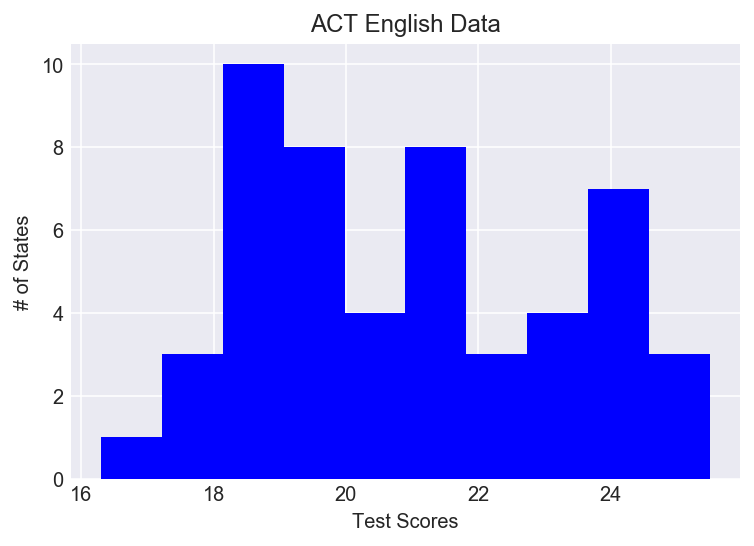

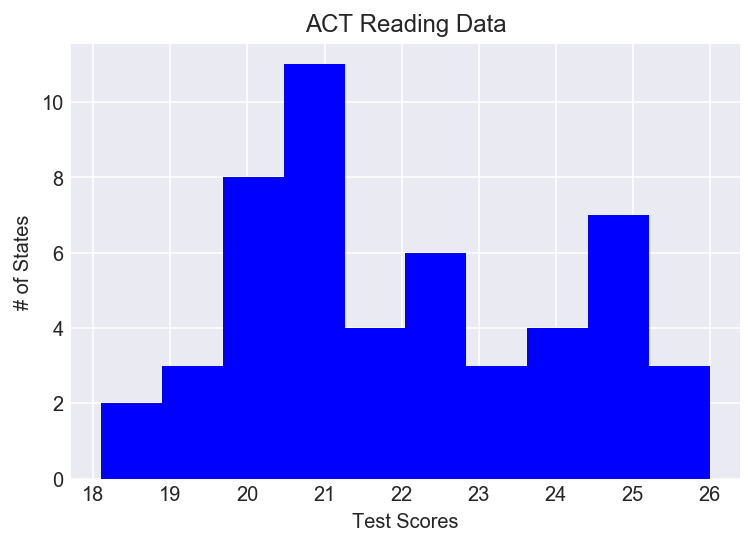

In [34]:
plt.figure(1)
plt.hist(clean_merge['SAT Reading and Writing'], facecolor='orange')
plt.title('SAT Reading & Writing Data')
plt.xlabel('Test Scores')
plt.ylabel('# of States')

plt.figure(2)
plt.hist(clean_merge['ACT English'], facecolor='blue')
plt.title('ACT English Data')
plt.xlabel('Test Scores')
plt.ylabel('# of States')

plt.figure(3)
plt.hist(clean_merge['ACT Reading'], facecolor='blue')
plt.title('ACT Reading Data')
plt.xlabel('Test Scores')
plt.ylabel('# of States');

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Most commmon assumption is that the data are normally distributed. 

##### 20. Does this assumption hold true for any of our columns? Which?

Assuming that this question only refers to the above columns we've been asked to plot, none appear to be normally distributed. This is just an assumption based on the physical appeareance of the histograms; No tests were performed.

##### 21. Plot some scatterplots examining relationships between all variables.

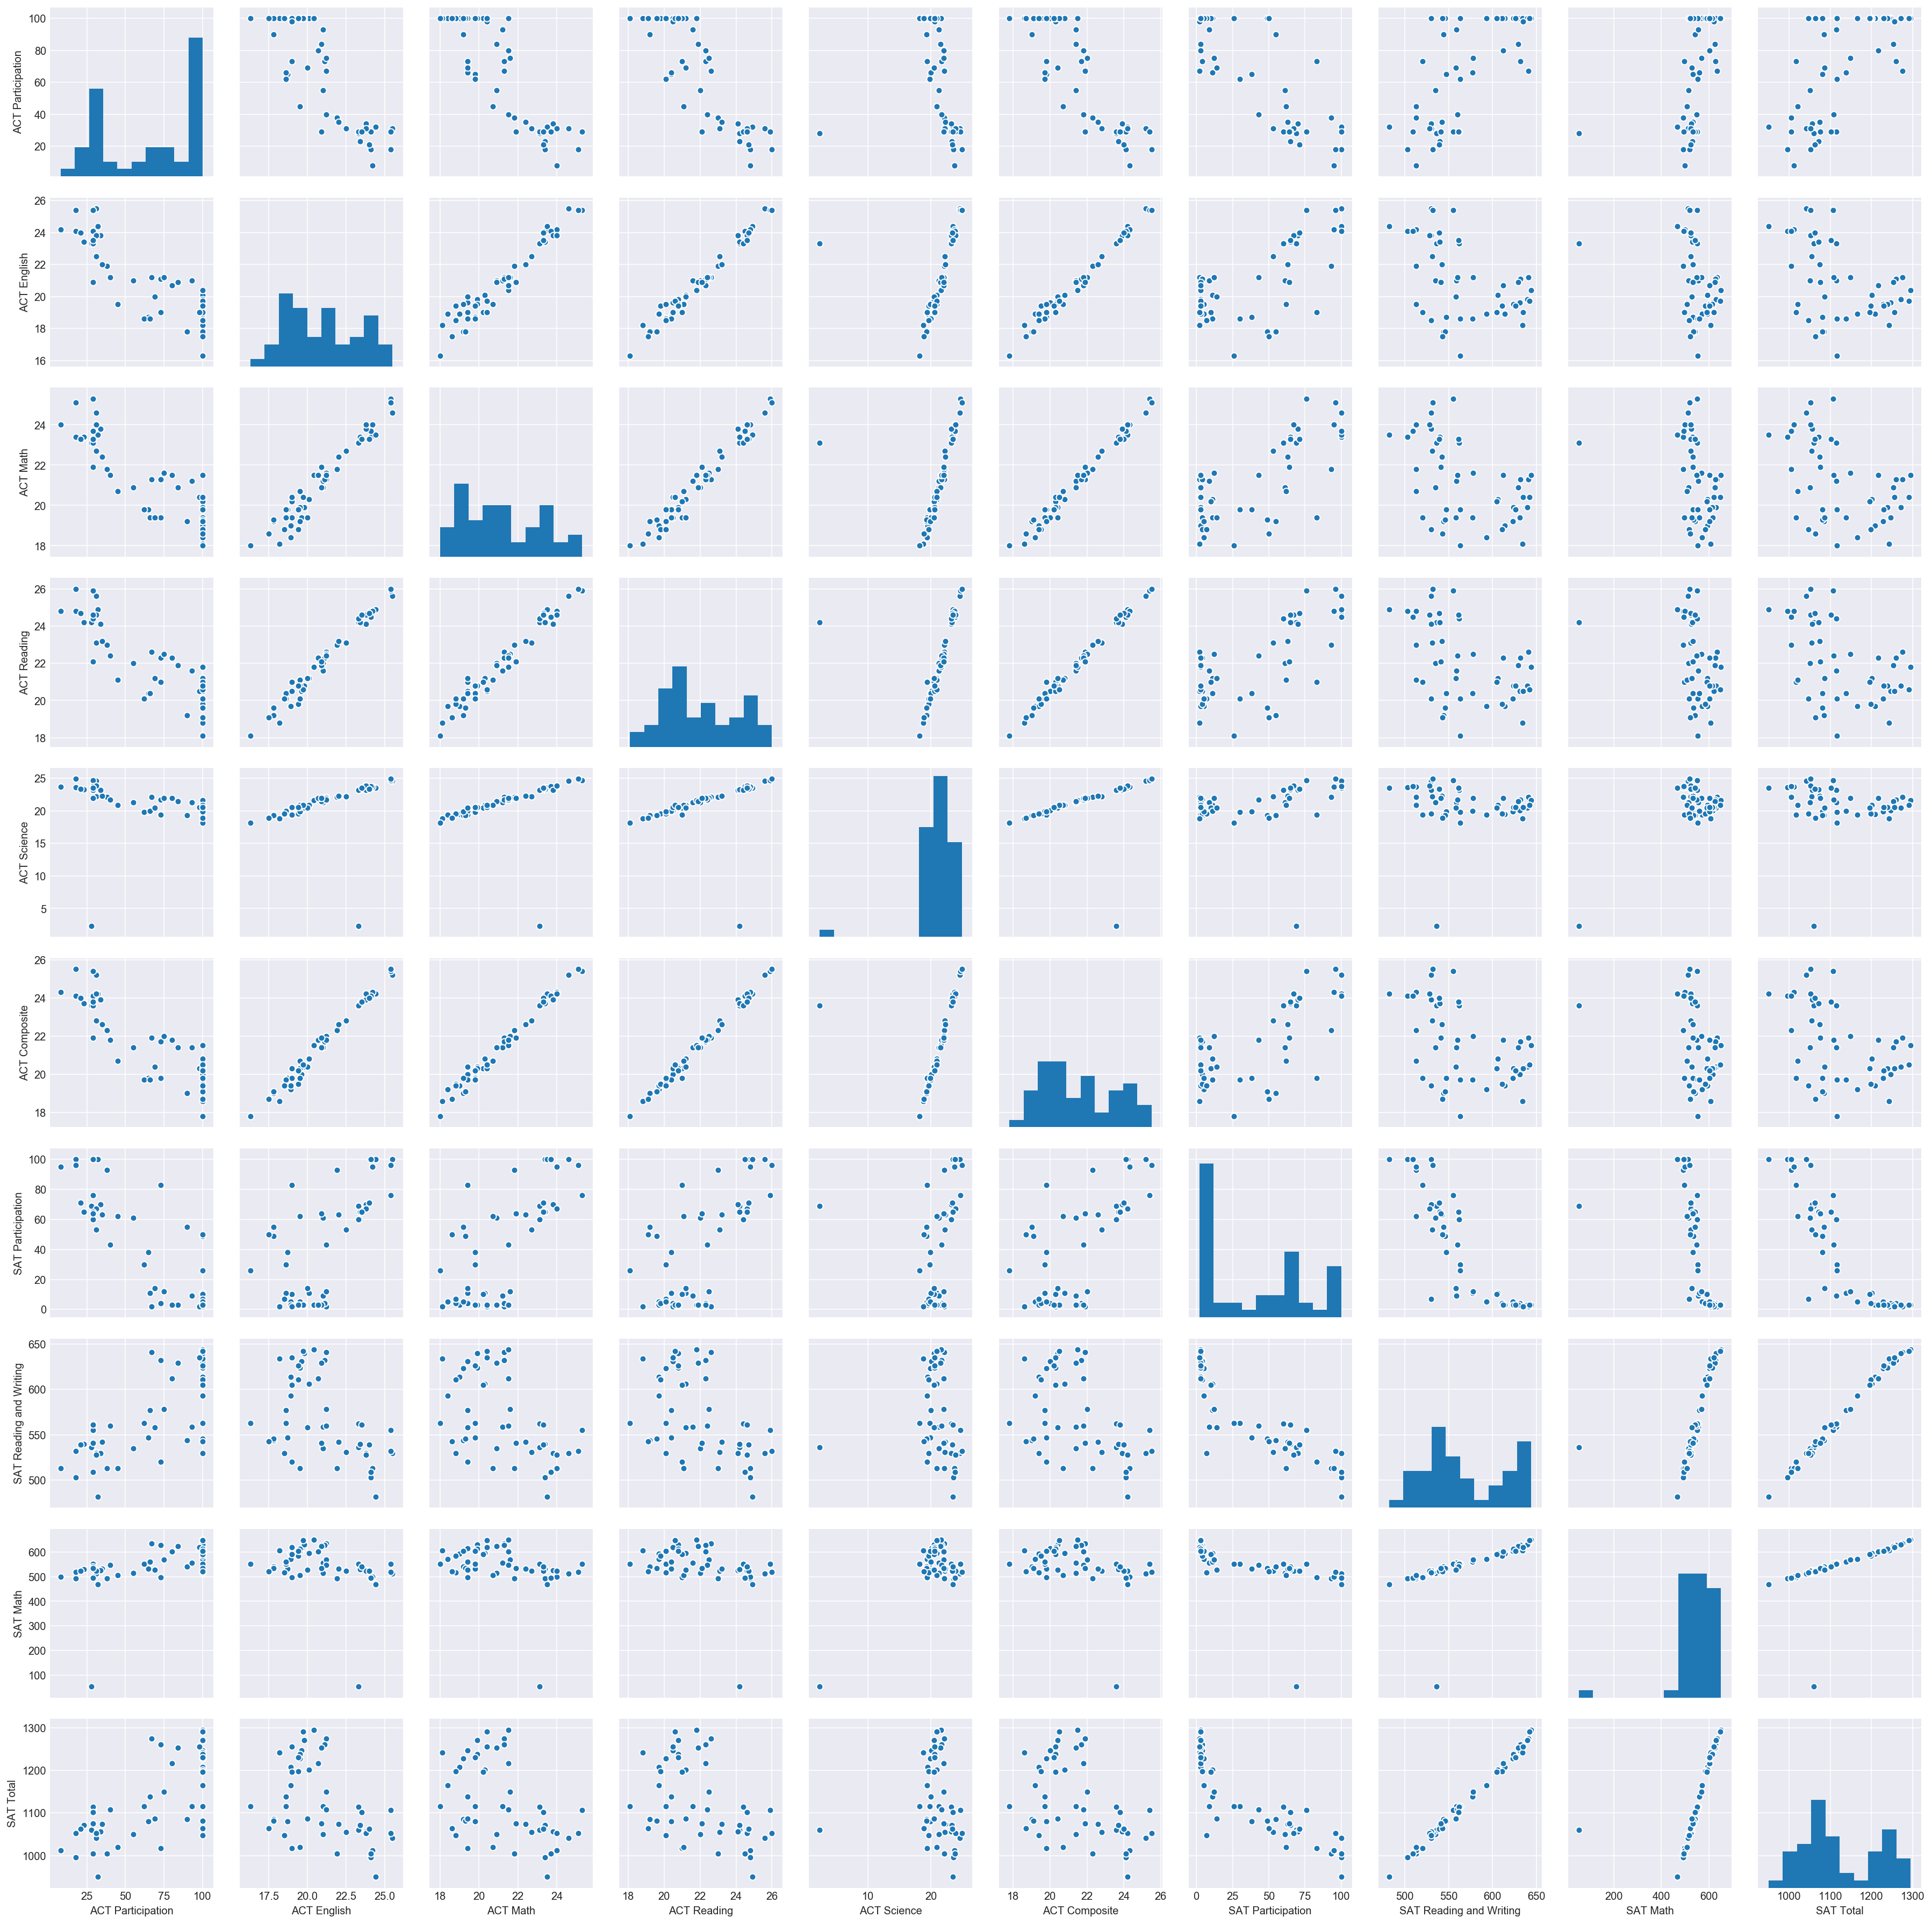

In [35]:
sns.pairplot(clean_merge); sns.set(style="ticks", color_codes=True);

##### 22. Are there any interesting relationships to note?

While a number of relationships exist between the variables, we will only highlight a few. ACT Reading and ACT Math seem to have a strong positive association. In fact, ACT Composite scores have a positive linear association with all the ACT subject-scores. This makes complete sense considering the composite score is comprised of the subject-scores, meaning the data is behaving as expected. This pattern holds true for SAT Total and the SAT subject-scores as well, with SAT Math showing a sharper relationship. Interesting, SAT subject-scores and ACT subject-scores do not seem to positively correlate, but trend toward zero association. 

##### 23. Create box plots for each variable. 

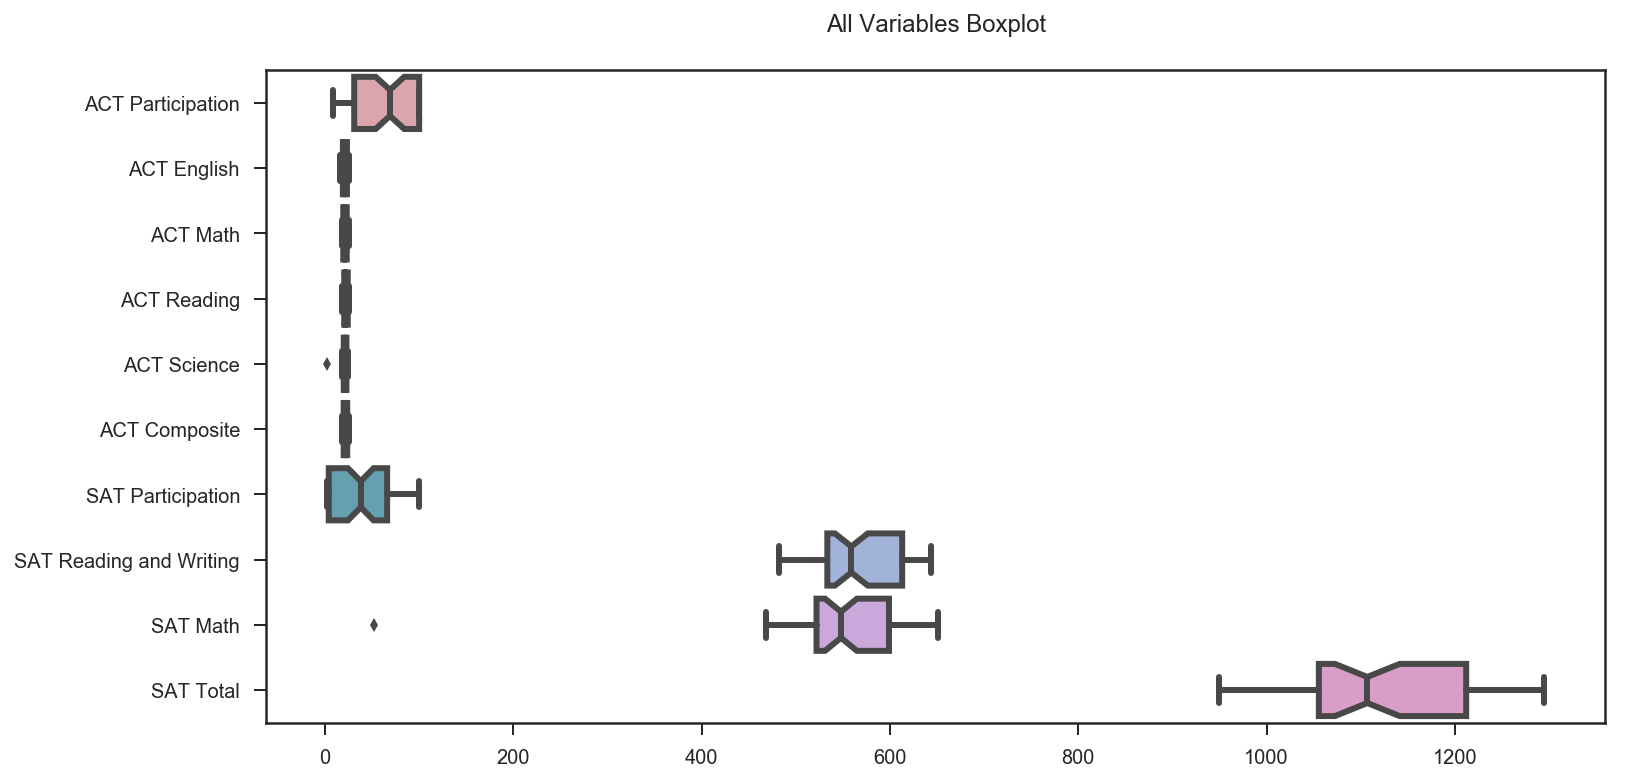

In [36]:
#All variables on 1 plot. This is ugly. Should be split into 2: ACT and SAT

fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=clean_merge, orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)
ax.autoscale_view
ax.set_title('All Variables Boxplot\n')
plt.show()

In [37]:
clean_merge.head()

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0


Text(0.5,1,'Total & Scores: SAT & ACT')

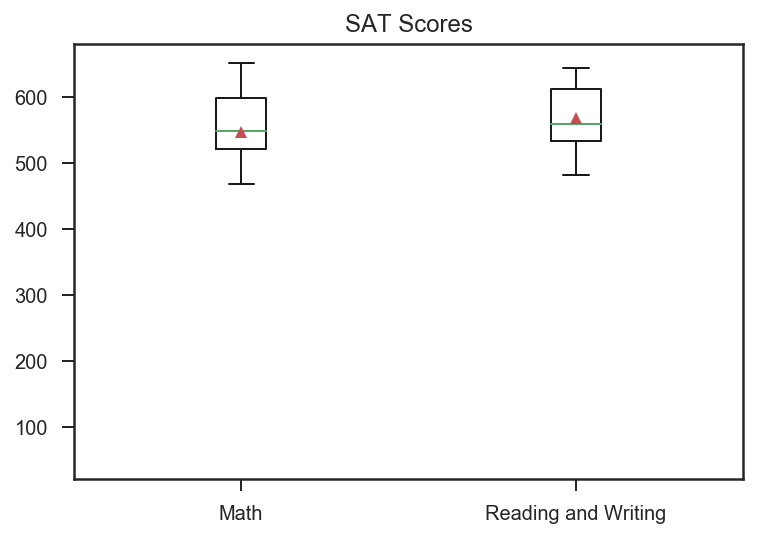

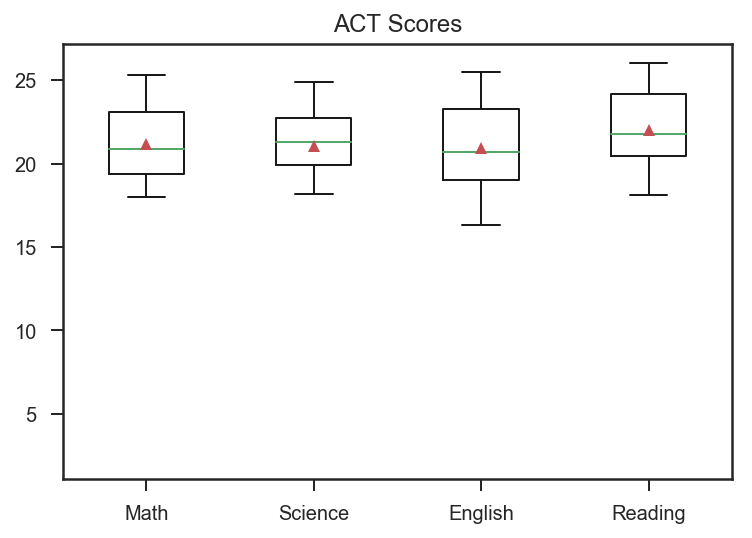

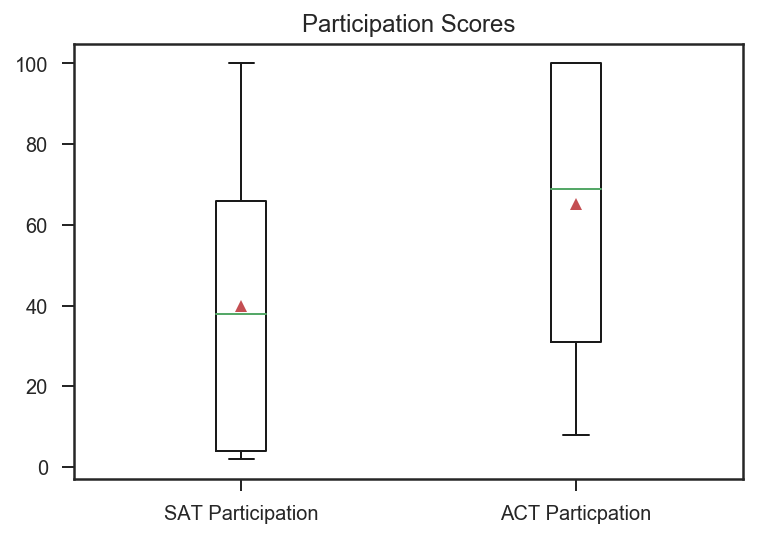

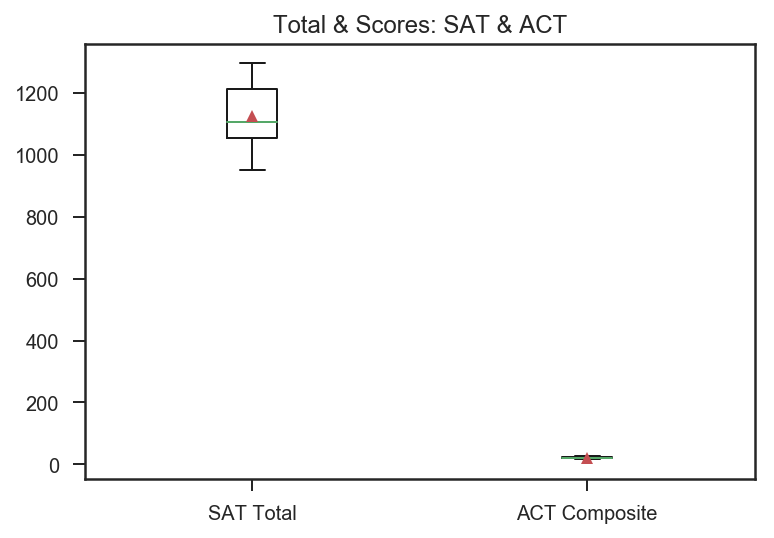

In [38]:
# Figure 1: SAT Subject-Scores
sat_boxp = [clean_merge['SAT Math'], clean_merge['SAT Reading and Writing']]
sat_boxp_labels = ('Math', 'Reading and Writing')

plt.figure(1)
plt.boxplot(sat_boxp,labels = sat_boxp_labels, showmeans=True)
plt.title('SAT Scores');

# Figure 2: ACT Subject-Scores
act_boxp = [clean_merge['ACT Math'],  clean_merge['ACT Science'], clean_merge['ACT English'], clean_merge['ACT Reading']]
act_boxp_labels = ('Math', 'Science', 'English', 'Reading')

plt.figure(2)
plt.boxplot(act_boxp,labels = act_boxp_labels, showmeans=True)
plt.title('ACT Scores');

#Figure 3: Participation Scores, both tests
parti_boxp = [clean_merge['SAT Participation'], clean_merge['ACT Participation']]
parti_boxp_labels = ('SAT Participation', 'ACT Particpation')

plt.figure(3)
plt.boxplot(parti_boxp, labels = parti_boxp_labels, showmeans=True)
plt.title('Participation Scores')

#Figure 4: Total Scores, both tests

total_score_boxp = [clean_merge['SAT Total'], clean_merge['ACT Composite']]
total_score_boxp_labels = ('SAT Total','ACT Composite')

plt.figure(4)
plt.boxplot(total_score_boxp, labels =total_score_boxp_labels, showmeans=True)
plt.title('Total & Scores: SAT & ACT')

#Well aware that these need to be scaled correctly but don't want to get bogged down.

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In order to summarize the large number of variables efficiently, we will declare some basic assumptions about the data. It's possible to infer the general normality of a distribution using three key figures: mean, median, and mode. For our purposes, we will assume the following:
- Distributions are positively skewed when mean > median > mode
- Distributions are symmetric when mean, mode, and median are equal 
- Distributions are negatively skewed when mode > median > mean


Variable: mean, median, mode

ACT Participation: 65.25 < 69.0 < 100 = negative skew
SAT Participation: 39.80> 38.0 > 3.0 = positive skew

ACT English: 20.9 > 20.7 > 19 = positive skew
ACT Math: 21.18 > 20.9 > 19.4 = positive skew
ACT Reading: 22.0 > 21.8 > 20.1 = positive skew
ACT Science: 21.04 < 21.3 > 20.5 = n/a
ACT Composite: 21.52 > 21.4 > 19.8 = positive skew

SAT Reading and Writing: 569.18 > 559.0 > 513.00 = positive skew
SAT Math: 547.63 < 548.0 > 524.0 = n/a
SAT Total: 1126.09 > 1107.0 > 1005.0 = positive skew

Based on the data above, we can make some general statements about our how certain variables are distributed. ACT participation is negatively skewed, with the mean less than both median and mode. We can interpret this as meaning ACT participation was above half for this year. Alternatively, SAT Participation was positively skewed. We interpret this as meaning test participation was low, and can support this claim by referencing the low value of the descriptive statistics.

Nearly all the ACT scores have a positive skew, with some distributions bordering on uniform normality (Reading in particular). These trends are reflected in the ACT composite score also being positively skewed.

SAT scores show a similar trend to that of ACT scores. Positive skews in subject-scores led to positively skewed total score.

In [39]:
clean_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
ACT Participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
ACT English,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
ACT Math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
ACT Reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
ACT Science,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
ACT Composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
SAT Participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
SAT Reading and Writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
SAT Math,51.0,547.627451,84.909119,52.0,522.00,548.0,599.00,651.0
SAT Total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

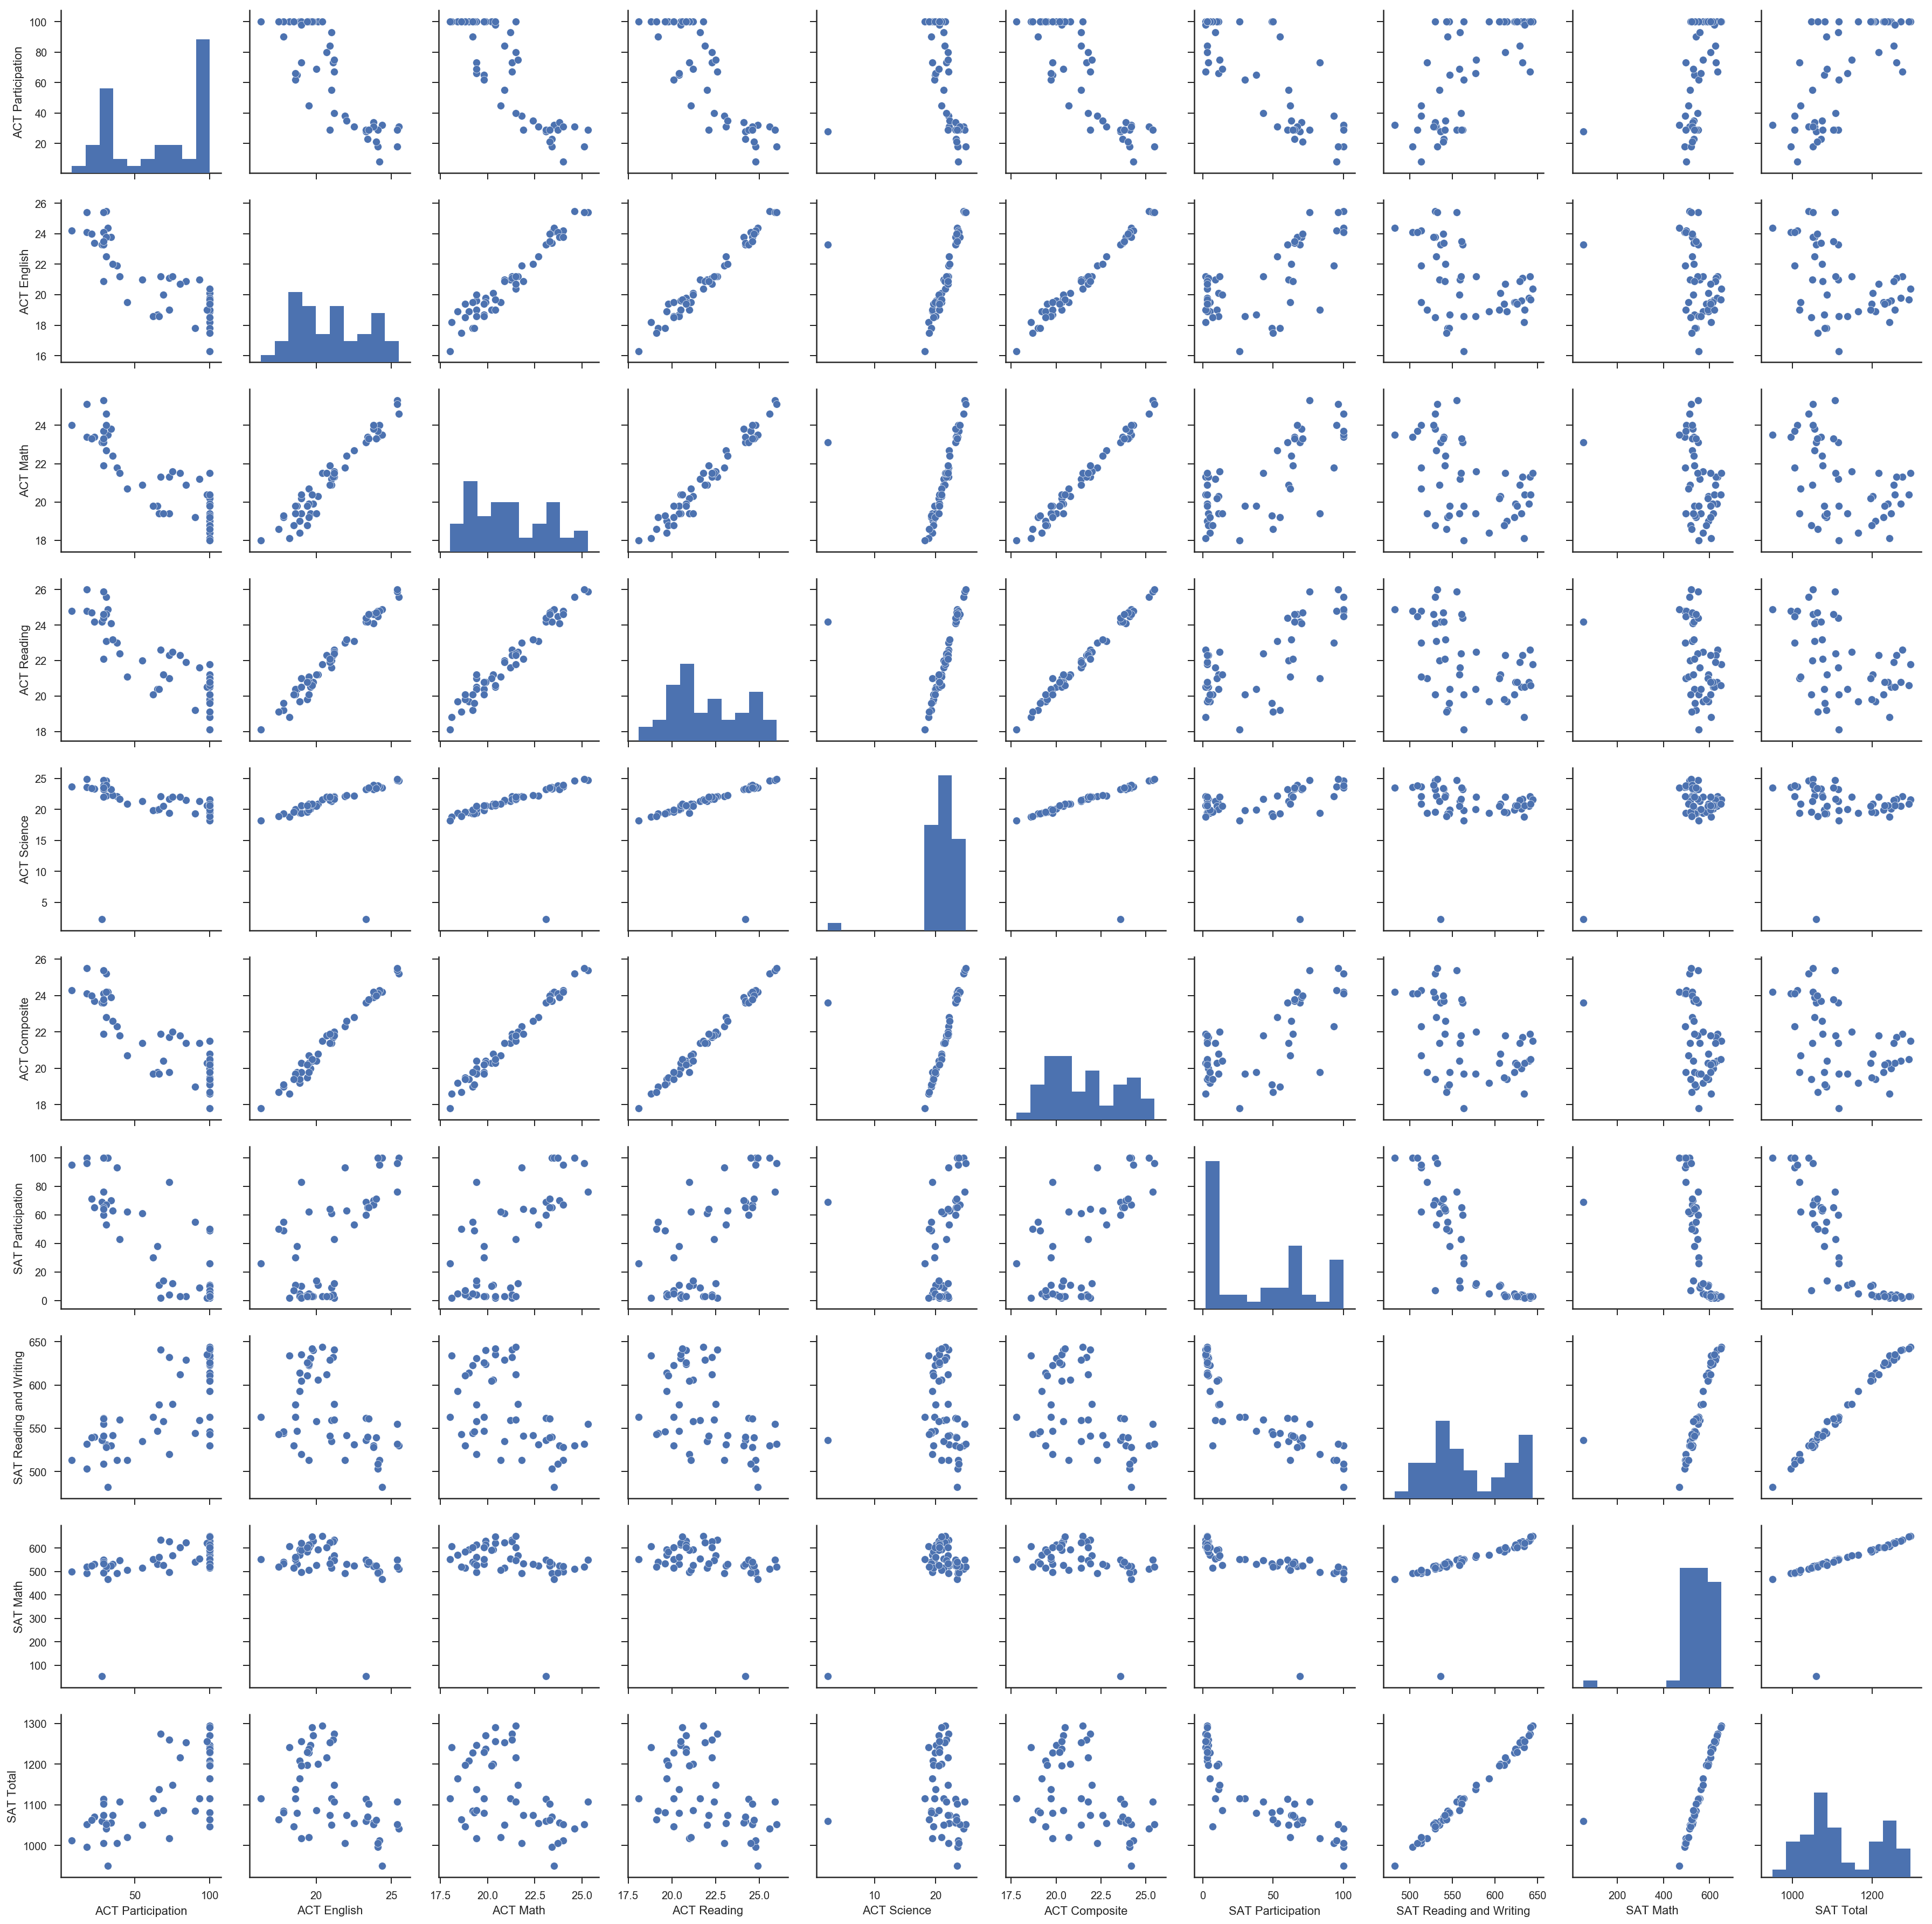

In [40]:
sns.pairplot(clean_merge);

ACT subject-scores are strongly positively associated with ACT Composite scores as well as with each other. This trend is also true for SAT subject-scores and SAT Total score. Interesting, high scores on the SAT Reading & Writing don't seem to have any association with high scores on ACT English or Writing. An interesting relationship seems to exist between ACT Science and SAT Math scores, with high scores clustering near the top.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

Since we are comparing 2 independent samples, we'll conduct a 2-sample T-test. Let's delcare our hypotheses as well:

Null hypothesis:         Mean of SAT Participation = Mean of ACT Participation  
Alternative hypothesis:  Mean of SAT Participation ≠ Mean of ACT Participation 

Alpha level = 0.05
If the p-value generated from a 2-sample T-test is < 0.05, we will reject the null hypohtesis.

In [41]:
#Let's do a 2 sample t-test!! Hooray!

t_test_results = stats.ttest_ind(clean_merge['SAT Participation'], clean_merge['ACT Participation'])
t_test_results

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

Our p-value is < 0.05, thus the null hypothesis is rejected. This means that the means of our two samples are not equal. In fact, they are nowhere near equal! Our high negative t statistic is also indicative of a low p-value.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [42]:
#SAT Participation Rates

stats.t.interval(0.95, len(clean_merge['SAT Participation'])-1, loc = np.mean(clean_merge['SAT Participation']),
                 scale = np.std(clean_merge['SAT Participation'], ddof = 1))

(-31.051279537380644, 110.65912267463554)

Interpretation: We are 95% confident that the true mean of SAT Participation rates falls between the lower (-31.05) and upper (110.66) intervals.

In [43]:
#ACT Participation Rates

stats.t.interval(0.95, len(clean_merge['ACT Participation'])-1, loc=np.mean(clean_merge['ACT Participation']),
                 scale=np.std(clean_merge['ACT Participation'], ddof = 1))


(0.698120935857574, 129.81168298571106)

Interpretation: We are 95% confident that the true mean of ACT Participation rates falls between the lower (0.70) and upper (129.81) intervals.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

The results of 26 are striking, but not surprising. The 2-tailed t-test assumes the data is normally distributed, but we know from prior analyses this is incorrect. This could, and likely would, account for the extremely wide range between intervals.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

I don't think it is appropriate to generate such a correlation for a number of reasons. First, the data are scored and scaled differently: SAT in the hundreds, but ACT only up to 36. Additionally, doing so would assume that each test has overlapping material. While this assumption might seem like a safe and obvious one to make, I would not feel comfortable making it without further research. 

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

This depends on waht you are looking for. The topics covered between the 2 tests may not be based on the same materials. This would make statistical inferences moot. Alternatively, if we were to assume the 2 tests essentially cover the same materials, then statistical inferences could be useful.